In [2]:
url1 = (r'https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/latest/owid-covid-latest.json')

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
import requests, pandas as pd
from bs4 import BeautifulSoup
import seaborn as sns; sns.set()
import urllib.request

pd.set_option('display.max_rows', 400)
pd.set_option('display.max_columns', 400)

In [51]:

#This is live data from the our world in data github. This is the csv they put on the website. Covid19 data.
data=pd.read_json(url1)
data1 = pd.DataFrame(data).T
data1 = data1.astype(str)
data1 = data1[data1 != 'None']
data1['total_deaths'] = data1['total_deaths'].astype(float)
data1['total_tests'] = data1['total_tests'].astype(float)



In [5]:
#Attempted to create the dataframe from the url but I got a forbidden 403 error.
url2 = ('https://apps.who.int/gho/athena/api/GHO/HWF_000.json?filter=YEAR:2019&filter=text')
url2

'https://apps.who.int/gho/athena/api/GHO/HWF_000.json?filter=YEAR:2019&filter=text'

In [6]:
#Printed encoding of csv file to read the csv.
with open(r'C:\Users\vw191\OneDrive\Documents\GitHub\107SBakst.github.io\data\who_doctors.csv') as f:
        print(f.encoding)

cp1252


In [50]:
#Created the dataframe and cleaned the location column.
data2 = pd.read_csv(r'C:\Users\vw191\OneDrive\Documents\GitHub\107SBakst.github.io\data\who_doctors.csv', encoding ="cp1252")
data2 = data2[data2['Period'] == 2018]
data2['Location'] = data2['Location'].replace('Iran (Islamic Republic of)', 'Iran')
data2['Location'] = data2['Location'].replace('CÃ´te dâ€™Ivoire', "Cote d'Ivoire")
data2['Location'] = data2['Location'].replace('United States of America', 'United States')
data2['Location'] = data2['Location'].replace('United Kingdom of Great Britain and Northern Ireland', 'United Kingdom')
data2['Location'] = data2['Location'].replace('Russian Federation', 'Russia')
data2['Location'] = data2['Location'].replace('Republic of Korea', 'South Korea')


In [52]:
#Merge the who doctors dataset with the covid19 api.
merged_covid_docs = pd.merge(data1, data2, left_on=['location'], right_on=['Location'])


In [9]:
# This is to set the values of the x variable and y variable.

d1 = 'Value'
d2 = 'life_expectancy'
merged_covid_docs[d1] = merged_covid_docs[d1].astype(float) # Ensuring that the column is float.
merged_covid_docs[d2] = merged_covid_docs[d2].astype(float)
chart_data = merged_covid_docs.dropna(subset=[d1 , d2]) #Dropping rows of na. This new dataframe is saved as chart_data.


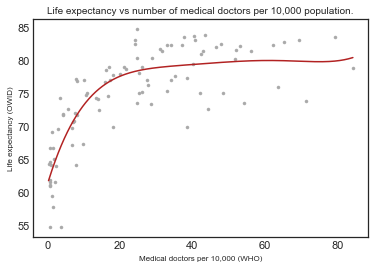

In [49]:
#Running a linear regression. The independent variable (x) is the number of doctors per 10,000 population. The dependent variable (y) is total covid-19 deaths.

x = chart_data[d1]
y = chart_data[d2]

poly_model = make_pipeline(PolynomialFeatures(5),
                           LinearRegression())
poly_model.fit(x[:, np.newaxis], y)
xfit = np.linspace(min(x), max(x), 1000)
yfit = poly_model.predict(xfit[:, np.newaxis])
plt.style.use('seaborn-white')
plt.scatter(x, y, color='darkgrey', marker='.')
plt.plot(xfit, yfit,color='firebrick')
plt.xlabel('Medical doctors per 10,000 (WHO)', size=8)
plt.ylabel('Life expectancy (OWID)', size=8)
plt.title('Life expectancy vs number of medical doctors per 10,000 population.', size=10)

plt.savefig(r'C:\Users\vw191\OneDrive\Documents\GitHub\107SBakst.github.io\charts\chart13_linear_regression.png', dpi=150)

In [19]:
import seaborn as sns
sns.set()

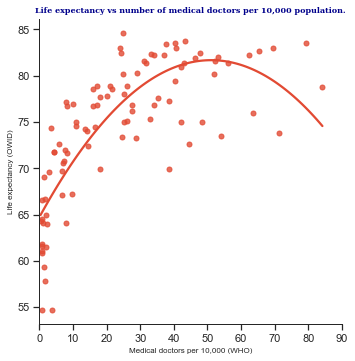

In [26]:
sns.set_style('ticks')


sns.lmplot(x=d1, y=d2, data=chart_data, order = 2, ci=None, scatter_kws={"s": 100}, markers='.', palette=dict(d2='g'))
plt.xlim(0,90)

font = {'family': 'serif',
        'color':  'darkblue',
        'weight': 'bold',
        'size': 8,
        }
plt.xlabel('Medical doctors per 10,000 (WHO)', size=8)
plt.ylabel('Life expectancy (OWID)', size=8)
plt.title('Life expectancy vs number of medical doctors per 10,000 population.', size=8, fontdict=font)
plt.savefig(r'C:\Users\vw191\OneDrive\Documents\GitHub\107SBakst.github.io\charts\chart13_regression.png', dpi=150)
